In [1]:
import numpy as np
import scienceplots
from matplotlib import pyplot as plt
import matplotlib as mp
import pandas as pd
import os
import scipy as sp
import seaborn as sns
import json
import yaml
import functools
import itertools

In [2]:
resdir = "../c/results"
os.listdir(resdir)

['batch', 'base', 'multi-queue']

In [3]:
base_dir = f"{resdir}/base"
multi_dir = f"{resdir}/multi-queue"
batch_dir = f"{resdir}/batch"

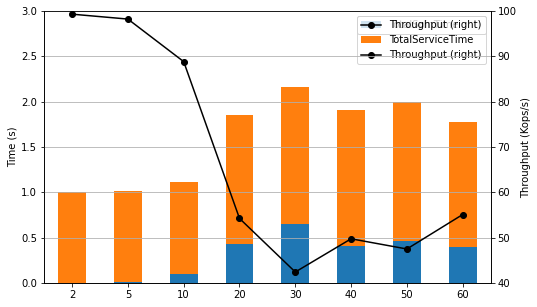

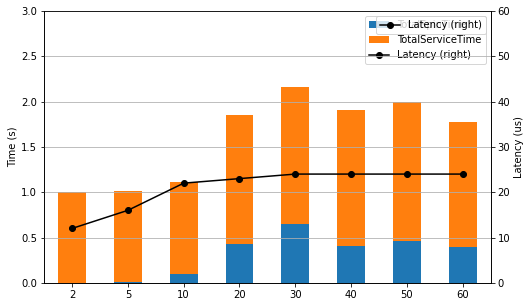

In [34]:
variant = "base"
dir = base_dir

summary_df = pd.read_csv(f"{dir}/{variant}_summary.csv")
summary_df = summary_df[summary_df.TotalConsumed == 10000]
summary_df['TotalSpinTime'] = summary_df['TotalSpinTime'] / 1e6
summary_df['TotalServiceTime'] = summary_df['TotalServiceTime'] / 1e6 
summary_df['TotalRunningTime'] = summary_df['TotalRunningTime'] / 1e6

summary_df['Throughput'] = summary_df.TotalConsumed * 1e-3 / summary_df.TotalRunningTime
# summary_df['SpinOverhead'] = summary_df.TotalSpinTime * 100 / summary_df.TotalRunningTime

minimal_duration = 10 * 10000 / 1e6
# Normalize TotalSpinTime, TotalServiceTime and TotalRunningTime to 10k consumed
summary_df['TotalSpinTime'] = summary_df['TotalSpinTime'] / minimal_duration
summary_df['TotalServiceTime'] = summary_df['TotalServiceTime'] / minimal_duration
summary_df['TotalRunningTime'] = summary_df['TotalRunningTime'] / minimal_duration

items = pd.read_csv(f"{dir}/{variant}_items.csv")
items = items[items.AccessTime != 0]
index = ['Variant', 'Consumers', 'ServiceTime']
df_latency = items.groupby(index).quantile(.99, numeric_only=True)['Latency']
df_waiters = items.groupby(index).quantile(.99, numeric_only=True)['Waiters']
df_access_time = items.groupby(index).quantile(.5, numeric_only=True)['AccessTime']

df_ = pd.concat([df_latency, df_waiters, df_access_time], axis=1)

df = summary_df.groupby(index).median(numeric_only=True)

df__ = pd.concat([df, df_], axis=1).reset_index()

# with plt.style.context(['science', 'ieee']):
ax = df__.plot.bar(figsize=(8, 5), 
    y=['TotalSpinTime', 'TotalServiceTime'], 
    stacked=True, capsize=5, rot=0, 
    ylabel="Time (s)", ylim=(0, 3))
df__.plot.line(
    y='Throughput', ax=ax, color='black', 
    marker='o', secondary_y=True, grid=True, 
    ylabel="Throughput (Kops/s)", ylim=[40, 100])

ax.set_xticklabels(df__.Consumers)
plt.legend(loc='upper right')
plt.show()

# with plt.style.context(['science', 'ieee']):
ax = df__.plot.bar(figsize=(8, 5), 
    y=['TotalSpinTime', 'TotalServiceTime'], 
    stacked=True, capsize=5, rot=0, 
    ylabel="Time (s)", ylim=(0, 3))
df__.plot.line(
    y='Latency', ax=ax, color='black', 
    marker='o', secondary_y=True, grid=True, 
    ylabel="Latency (us)", ylim=[0, 60])

ax.set_xticklabels(df__.Consumers)
plt.legend(loc='upper right')
plt.show()


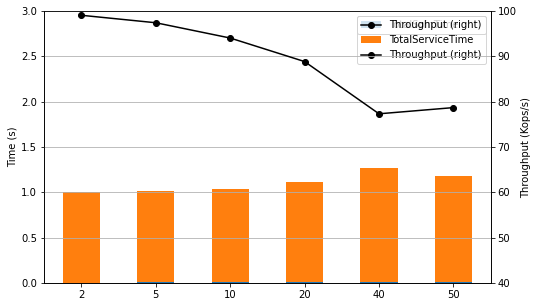

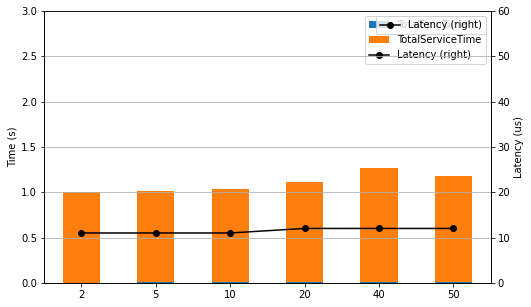

In [51]:
variant = "multi"
dir = multi_dir

summary_df = pd.read_csv(f"{dir}/{variant}_summary.csv")
summary_df = summary_df[summary_df.TotalConsumed == 10000]
summary_df['TotalSpinTime'] = summary_df['TotalSpinTime'] / 1e6
summary_df['TotalServiceTime'] = summary_df['TotalServiceTime'] / 1e6 
summary_df['TotalRunningTime'] = summary_df['TotalRunningTime'] / 1e6

summary_df['Throughput'] = summary_df.TotalConsumed * 1e-3 / summary_df.TotalRunningTime
# summary_df['SpinOverhead'] = summary_df.TotalSpinTime * 100 / summary_df.TotalRunningTime

minimal_duration = 10 * 10000 / 1e6
# Normalize TotalSpinTime, TotalServiceTime and TotalRunningTime to 10k consumed
summary_df['TotalSpinTime'] = summary_df['TotalSpinTime'] / minimal_duration
summary_df['TotalServiceTime'] = summary_df['TotalServiceTime'] / minimal_duration
summary_df['TotalRunningTime'] = summary_df['TotalRunningTime'] / minimal_duration

items = pd.read_csv(f"{dir}/{variant}_items.csv")
items = items[items.AccessTime != 0]
index = ['Variant', 'Consumers', 'ServiceTime']
df_latency = items.groupby(index).quantile(.99, numeric_only=True)['Latency']
df_waiters = items.groupby(index).quantile(.99, numeric_only=True)['Waiters']
df_access_time = items.groupby(index).quantile(.5, numeric_only=True)['AccessTime']

df_ = pd.concat([df_latency, df_waiters, df_access_time], axis=1)

df = summary_df.groupby(index).median(numeric_only=True)

df__ = pd.concat([df, df_], axis=1).reset_index().dropna()

# with plt.style.context(['science', 'ieee']):
ax = df__.plot.bar(figsize=(8, 5), 
    y=['TotalSpinTime', 'TotalServiceTime'], 
    stacked=True, capsize=5, rot=0, 
    ylabel="Time (s)", ylim=(0, 3))
df__.plot.line(
    y='Throughput', ax=ax, color='black', 
    marker='o', secondary_y=True, grid=True, 
    ylabel="Throughput (Kops/s)", ylim=[40, 100])

ax.set_xticklabels(df__.Consumers)
plt.legend(loc='upper right')
plt.show()

# with plt.style.context(['science', 'ieee']):
ax = df__.plot.bar(figsize=(8, 5), 
    y=['TotalSpinTime', 'TotalServiceTime'], 
    stacked=True, capsize=5, rot=0, 
    ylabel="Time (s)", ylim=(0, 3))
df__.plot.line(
    y='Latency', ax=ax, color='black', 
    marker='o', secondary_y=True, grid=True, 
    ylabel="Latency (us)", ylim=[0, 60])

ax.set_xticklabels(df__.Consumers)
plt.legend(loc='upper right')
plt.show()


In [52]:
variant = "batch"
dir = batch_dir

summary_df = pd.read_csv(f"{dir}/{variant}_summary.csv")
summary_df = summary_df[summary_df.TotalConsumed == 10000]
summary_df['TotalSpinTime'] = summary_df['TotalSpinTime'] / 1e6
summary_df['TotalServiceTime'] = summary_df['TotalServiceTime'] / 1e6 
summary_df['TotalRunningTime'] = summary_df['TotalRunningTime'] / 1e6


summary_df['Throughput'] = summary_df.TotalConsumed * 1e-3 / summary_df.TotalRunningTime
# summary_df['SpinOverhead'] = summary_df.TotalSpinTime * 100 / summary_df.TotalRunningTime

minimal_duration = 10 * 10000 / 1e6
# Normalize TotalSpinTime, TotalServiceTime and TotalRunningTime to 10k consumed
summary_df['TotalSpinTime'] = summary_df['TotalSpinTime'] / minimal_duration
summary_df['TotalServiceTime'] = summary_df['TotalServiceTime'] / minimal_duration
summary_df['TotalRunningTime'] = summary_df['TotalRunningTime'] / minimal_duration


In [53]:
items = pd.read_csv(f"{dir}/{variant}_items.csv")
items = items[items.AccessTime != 0]

In [54]:
numeric = pd.to_numeric(items.Latency, errors='coerce')
items['Latency'] = numeric
items = items[~numeric.isna()]

In [55]:
index = ['Variant', 'Consumers', 'ServiceTime', 'BatchSize']

In [56]:

q99 = items.groupby(index).quantile(.99, numeric_only=True)
q50 = items.groupby(index).quantile(.50, numeric_only=True)

df_latency = q99['Latency']
df_waiters = q99['Waiters']

In [57]:
df_access_time = q50['AccessTime']

In [58]:
df_ = pd.concat([df_latency, df_waiters, df_access_time], axis=1)
df = summary_df.groupby(index).median(numeric_only=True)

In [62]:
df__ = pd.concat([df, df_], axis=1).reset_index().dropna()

In [63]:
print(df__.Consumers.unique())
print(df__.BatchSize.unique())

[ 2  5 10 20 30 40 50 60]
[ 1  2  4  8 16 32]


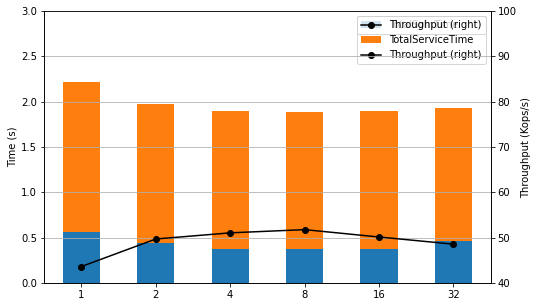

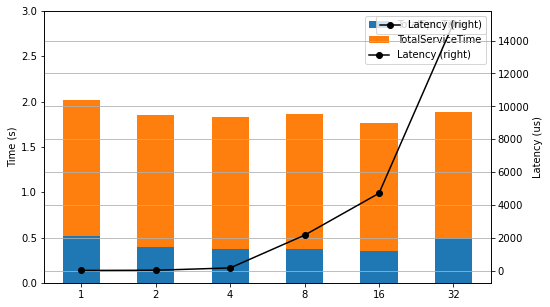

In [70]:
consumers = 50
df = df__[df__.Consumers == consumers].reset_index(drop=True)

# with plt.style.context(['science', 'ieee']):
ax = df.plot.bar(figsize=(8, 5), 
    y=['TotalSpinTime', 'TotalServiceTime'], 
    stacked=True, capsize=5, rot=0, 
    ylabel="Time (s)", ylim=(0, 3))
df.plot.line(
    y='Throughput', ax=ax, color='black', 
    marker='o', secondary_y=True, grid=True, 
    ylabel="Throughput (Kops/s)", ylim=[40, 100])

ax.set_xticklabels(df.BatchSize)
plt.legend(loc='upper right')
plt.show()

consumers = 60
df = df__[df__.Consumers == consumers].reset_index(drop=True)

# with plt.style.context(['science', 'ieee']):
ax = df.plot.bar(figsize=(8, 5), 
    y=['TotalSpinTime', 'TotalServiceTime'], 
    stacked=True, capsize=5, rot=0, 
    ylabel="Time (s)", ylim=(0, 3))
df.plot.line(
    y='Latency', ax=ax, color='black', 
    marker='o', secondary_y=True, grid=True, 
    ylabel="Latency (us)")

ax.set_xticklabels(df.BatchSize)
plt.legend(loc='upper right')
plt.show()

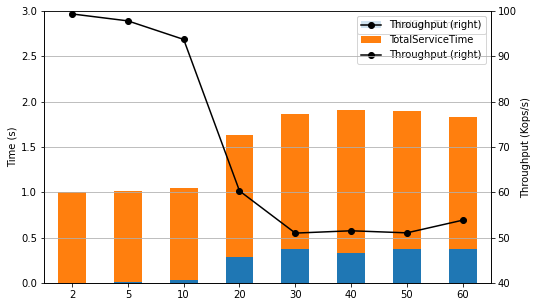

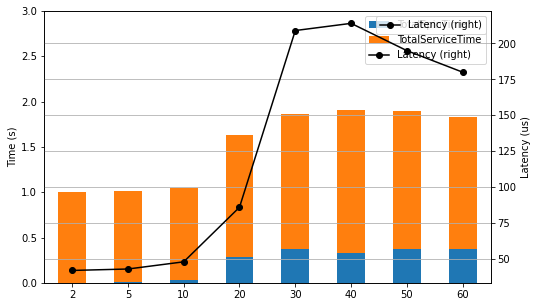

In [72]:
batchSize = 4
df = df__[df__.BatchSize == batchSize].reset_index(drop=True)

# with plt.style.context(['science', 'ieee']):
ax = df.plot.bar(figsize=(8, 5), 
    y=['TotalSpinTime', 'TotalServiceTime'], 
    stacked=True, capsize=5, rot=0, 
    ylabel="Time (s)", ylim=(0, 3))
df.plot.line(
    y='Throughput', ax=ax, color='black', 
    marker='o', secondary_y=True, grid=True, 
    ylabel="Throughput (Kops/s)", ylim=[40, 100])

ax.set_xticklabels(df.Consumers)
plt.legend(loc='upper right')
plt.show()

# with plt.style.context(['science', 'ieee']):
ax = df.plot.bar(figsize=(8, 5), 
    y=['TotalSpinTime', 'TotalServiceTime'], 
    stacked=True, capsize=5, rot=0, 
    ylabel="Time (s)", ylim=(0, 3))
df.plot.line(
    y='Latency', ax=ax, color='black', 
    marker='o', secondary_y=True, grid=True, 
    ylabel="Latency (us)")

ax.set_xticklabels(df.Consumers)
plt.legend(loc='upper right')
plt.show()